In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..')))

In [3]:

#mport sys,os
#sys.path.append(os.path.abspath(os.path.join(os.path.dirname('/..scripts'))))


In [4]:
file_path='../data/data_source.csv'

os.chdir('..')
import data_preparation as pre
from scripts.data_preprocessing import load_data

In [5]:
from scripts.data_preprocessing import load_data,preprocess_data,check_missing_values,select_columns

In [6]:
from scripts.data_preparation import select_columns,load_data

In [7]:
from scripts.handle_duplicates import remove_duplicates

In [8]:
from scripts.data_analysis import top_handsets,top_handsets_per_manufacturer,top_manufacturers

In [9]:
from scripts.utils import load_data,check_missing_values

In [10]:
file_path='../data/data_source.csv'

In [11]:
df=pd.read_csv('../data/data_source.csv')
print(df.head())

      Bearer Id            Start  Start ms              End  End ms  \
0  1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1  1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2  1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3  1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4  1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

      Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0  9.16456699548519E+015  ...          15854611.0           2501332.0   
1                L77566A  ...          20247395.0          19111729.0   

In [12]:
duplicate=df.duplicated()
print(duplicate)

0         False
1         False
2         False
3         False
4         False
          ...  
149996    False
149997    False
149998    False
149999    False
150000    False
Length: 150001, dtype: bool


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [14]:
df.isnull()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
149997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
149998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
149999,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [15]:
df.describe

<bound method NDFrame.describe of            Bearer Id            Start  Start ms              End  End ms  \
0       1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1       1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2       1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3       1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4       1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   
...              ...              ...       ...              ...     ...   
149996  7.277826e+18   4/29/2019 7:28     451.0   4/30/2019 6:02   214.0   
149997  7.349883e+18   4/29/2019 7:28     483.0  4/30/2019 10:41   187.0   
149998  1.311448e+19   4/29/2019 7:28     283.0  4/30/2019 10:46   810.0   
149999  1.311448e+19   4/29/2019 7:28     696.0  4/30/2019 10:40   327.0   
150000           NaN              NaN       NaN              NaN     NaN   

        Dur. (ms)          IMSI  MSISDN/Number       

In [16]:
df.duplicated

<bound method DataFrame.duplicated of            Bearer Id            Start  Start ms              End  End ms  \
0       1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1       1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2       1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3       1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4       1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   
...              ...              ...       ...              ...     ...   
149996  7.277826e+18   4/29/2019 7:28     451.0   4/30/2019 6:02   214.0   
149997  7.349883e+18   4/29/2019 7:28     483.0  4/30/2019 10:41   187.0   
149998  1.311448e+19   4/29/2019 7:28     283.0  4/30/2019 10:46   810.0   
149999  1.311448e+19   4/29/2019 7:28     696.0  4/30/2019 10:40   327.0   
150000           NaN              NaN       NaN              NaN     NaN   

        Dur. (ms)          IMSI  MSISDN/Number   

In [17]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns

# Fill missing values with the median for numeric columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 150001 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150001 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150001 non-null  float64
 5   Dur. (ms)                                 150001 non-null  float64
 6   IMSI                                      150001 non-null  float64
 7   MSISDN/Number                             150001 non-null  float64
 8   IMEI                                      150001 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [18]:
df.drop_duplicates(inplace=True)


In [19]:
df.isnull

<bound method DataFrame.isnull of            Bearer Id            Start  Start ms              End  End ms  \
0       1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1       1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2       1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3       1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4       1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   
...              ...              ...       ...              ...     ...   
149996  7.277826e+18   4/29/2019 7:28     451.0   4/30/2019 6:02   214.0   
149997  7.349883e+18   4/29/2019 7:28     483.0  4/30/2019 10:41   187.0   
149998  1.311448e+19   4/29/2019 7:28     283.0  4/30/2019 10:46   810.0   
149999  1.311448e+19   4/29/2019 7:28     696.0  4/30/2019 10:40   327.0   
150000  7.349883e+18              NaN     499.0              NaN   500.0   

        Dur. (ms)          IMSI  MSISDN/Number       

In [20]:
print(df.columns)

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [21]:
# Handle missing values for numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())


In [22]:
# Example for categorical columns (replace 'Last Location Name' with any actual categorical column)
df['Last Location Name'].fillna('Unknown', inplace=True)


C:\Users\h\AppData\Local\Temp\ipykernel_16604\244573273.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Last Location Name'].fillna('Unknown', inplace=True)


In [23]:
# Assuming there are join_date and monthly_spending columns, replace with actual columns in your dataset if different
df['join_date'] = pd.to_datetime(df['Start'])  # Example of a join date column

# Create tenure (in days)
df['tenure'] = pd.to_datetime(df['join_date']).apply(lambda x: (pd.to_datetime('today') - x).days)

# Categorize customers based on spending
# Example column names, replace 'monthly_spending' with actual column
df['spending_category'] = pd.cut(df['Total DL (Bytes)'], bins=[0, 10**6, 10**7, 10**8, 10**9], labels=['Low', 'Medium', 'High', 'Very High'])

# Segment customers based on usage (e.g., heavy data users)
df['heavy_data_user'] = df['Total DL (Bytes)'] > df['Total DL (Bytes)'].quantile(0.75)


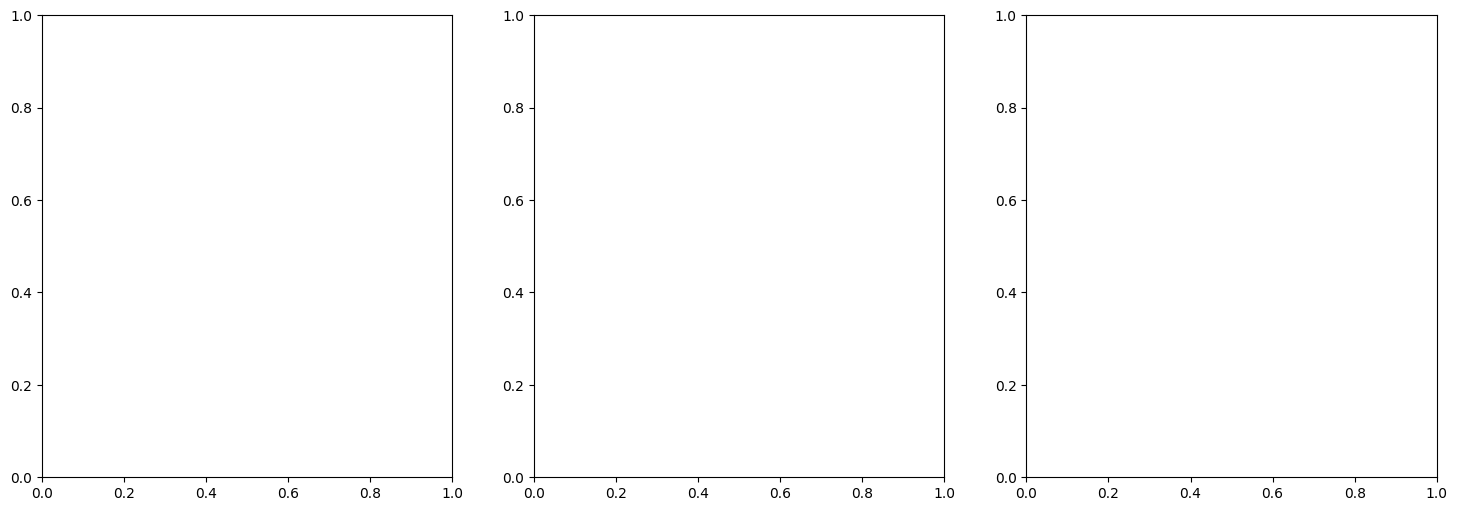

In [31]:
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))


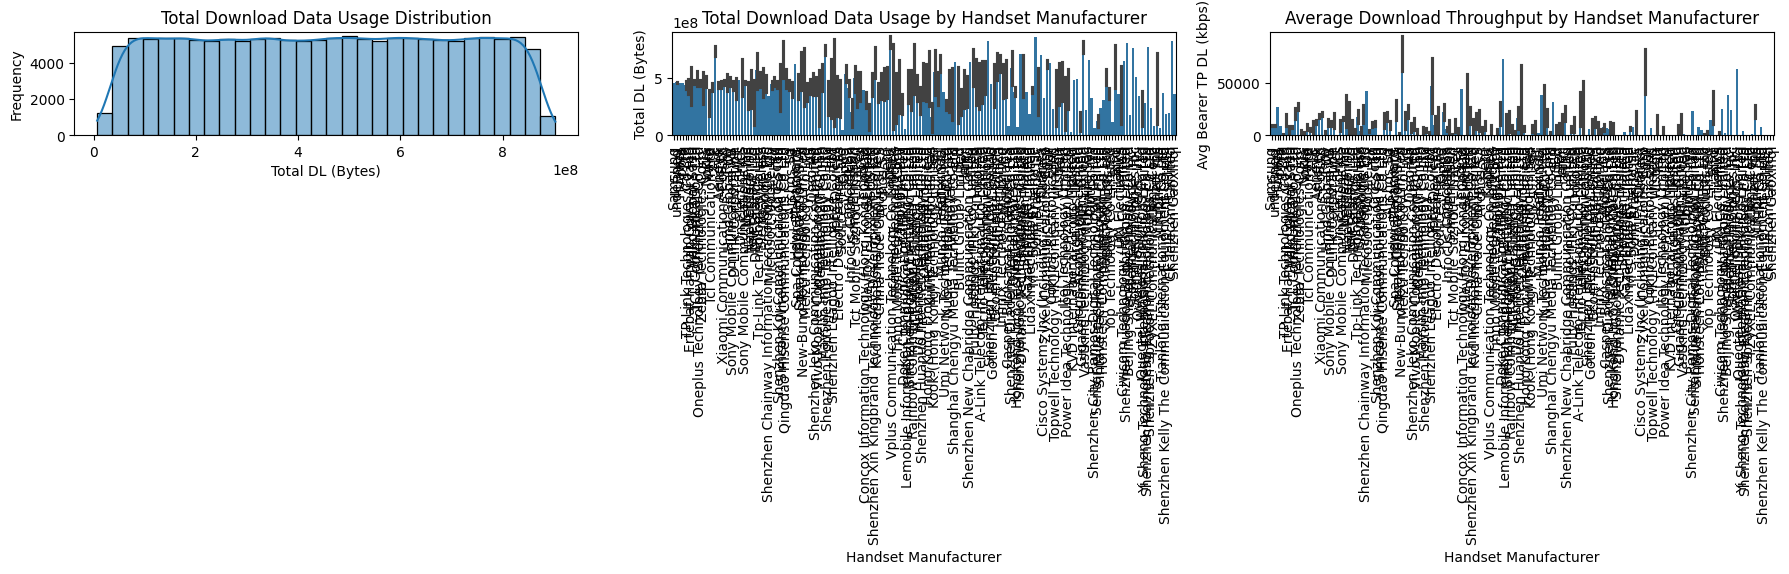

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df is already loaded with the relevant data
# Example: df = pd.read_csv('path_to_your_dataset.csv')

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: Distribution of Total Download Data Usage
sns.histplot(df['Total DL (Bytes)'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Total Download Data Usage Distribution')
axes[0].set_xlabel('Total DL (Bytes)')
axes[0].set_ylabel('Frequency')

# Plot 2: Total Download Data Usage by Handset Manufacturer (example usage)
sns.barplot(data=df, x='Handset Manufacturer', y='Total DL (Bytes)', ax=axes[1])
axes[1].set_title('Total Download Data Usage by Handset Manufacturer')
axes[1].set_xlabel('Handset Manufacturer')
axes[1].set_ylabel('Total DL (Bytes)')
axes[1].tick_params(axis='x', rotation=90)  # Rotate x-axis labels if there are many manufacturers

# Plot 3: Average Download Throughput by Handset Manufacturer
sns.barplot(data=df, x='Handset Manufacturer', y='Avg Bearer TP DL (kbps)', ax=axes[2])
axes[2].set_title('Average Download Throughput by Handset Manufacturer')
axes[2].set_xlabel('Handset Manufacturer')
axes[2].set_ylabel('Avg Bearer TP DL (kbps)')
axes[2].tick_params(axis='x', rotation=90)  # Rotate x-axis labels if there are many manufacturers

# Display the plots
plt.tight_layout()
plt.show()


In [33]:
# Group by spending categories and calculate mean and count
spending_summary = df.groupby('spending_category')['Total DL (Bytes)'].agg(['mean', 'count'])

# Display the summary
print(spending_summary)


                           mean   count
spending_category                      
Low                         NaN       0
Medium             9.127180e+06       9
High               6.577865e+07   12114
Very High          4.888383e+08  137878


C:\Users\h\AppData\Local\Temp\ipykernel_16604\967301757.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  spending_summary = df.groupby('spending_category')['Total DL (Bytes)'].agg(['mean', 'count'])


C:\Users\h\AppData\Local\Temp\ipykernel_16604\736914084.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='spending_category', palette='Set2')


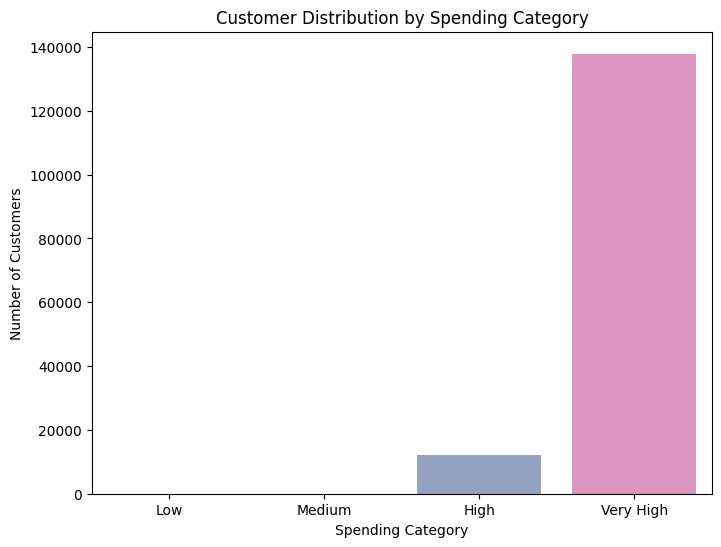

In [34]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='spending_category', palette='Set2')
plt.title('Customer Distribution by Spending Category')
plt.xlabel('Spending Category')
plt.ylabel('Number of Customers')
plt.show()


In [35]:
# Group by heavy data user status and calculate mean and count
heavy_data_summary = df.groupby('heavy_data_user')['Total DL (Bytes)'].agg(['mean', 'count'])

# Display the summary
print(heavy_data_summary)


                         mean   count
heavy_data_user                      
False            3.490088e+08  112501
True             7.715501e+08   37500
